# <b><u> Project Title : Online Retail Customer Segmentation on Tansnational Tataset. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#Importing Libraries

In [4]:
#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

#Model Building Prerequisits
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Evaluation Metrics
from sklearn.metrics import silhouette_score, silhouette_samples

#Models used
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#For getting clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage

#Supress future warnings
import warnings
warnings.filterwarnings('ignore')

#Reading the Dataset

In [5]:
#Define url for stored dataset
url = 'https://drive.google.com/uc?export=download&id=1rTzA2bJ6nZqjiHjuQ6lV4Y4ko2BAvXla'

#Read the csv file into pandas dataframe
data = pd.read_excel(url)

###Observing raw data visually 

In [6]:
#Getting the first 5 observations
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
#Getting the last 5 observations
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


###Getting the shape of dataset

In [8]:
data.shape

(541909, 8)

###Data Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


###Descriptive Statistics

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


###Checking for Missing Observations

In [11]:
#Checking for the count of missing values 
print('Missing value count with respect to each column:')
data.isna().sum()

Missing value count with respect to each column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

'CustomerID' column seems to contain a lot of missing values. Let's check how much of these constitute in our data, in percentage.

In [12]:
#Checking percentage missing values in our data.
print(round(data[['CustomerID', 'Description']].isnull().sum()/len(data)*100,2))

CustomerID     24.93
Description     0.27
dtype: float64


###Checking for Duplicate Observations

In [13]:
#Checking for the count of duplicate values 
print('Duplicate value count:')
len(data[data.duplicated()])

Duplicate value count:


5268

###**Observations**

* Our original Dataset contains 541909 rows and 8 columns.
* There are 3 numerical, 1 Date-Time and 4 catagorical features present in our dataset.
* Almost 25% values in 'CustomerID' feature of our original dataset contains missing values.
* There are 5268 duplicate observations present in our data.

#Data Cleaning

###Missing value treatment

* The observations suggest that about 25% of data does not have a CustomerID.
* Which means these purchases haven't been assigned to any customer.
* We must remove these observations as these do not help us in forming clusters, as these can't be related to a CustomerID.
* We can also remove missing values from the 'Description' feature.

In [14]:
#Dropping null values
data.dropna(inplace=True)

In [15]:
#Dataset shape after removing null values
data.shape

(406829, 8)

###Duplicate value treatment

* We can simply drop the duplicate values as these are very low in number.

In [16]:
#Dropping duplicate observations
data.drop_duplicates(inplace=True)

In [17]:
#Dataset shape after removing duplicate values
data.shape

(401604, 8)

###Cleaning some more

* As given in the data dictionary, some values in 'InvoiceNo' column contain observations beginning with 'c'


* "If this code (InvoiceNo) starts with letter 'c', it indicates a cancellation"
* We will drop these rows.

In [18]:
#Converting 'InvoiceNo' to string
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [19]:
#Viewing these observations
data[data['InvoiceNo'].str.contains('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [20]:
#Removing observations with InvoiceNo beginning with 'c'
data = data[~data['InvoiceNo'].str.contains('C')]

In [21]:
#Dataset shape after removing observations with InvoiceNo beginning with 'c'
data.shape

(392732, 8)

In [22]:
#Dataset information after data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


###**Observations**

* Our dataset no more contains any missing or duplicate values.
* We are left with 392732 rows after cleaning the data.

#Feature Engineering

##Date-Time features
* Our dataset contains 'InvoiceDate' feature which gives us the date and time of the transactions.
* We can extract saperate features for each year, month, day, etc.

In [23]:
#Converting 'InvoiceDate' to date-time format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [24]:
#Extracting the Year
data["Year"] = data["InvoiceDate"].apply(lambda x: x.year)

#Extracting the Month Name
data['Month'] = data["InvoiceDate"].apply(lambda x: x.month_name())

#Extracting the Month Number
data['MonthNum'] = data["InvoiceDate"].apply(lambda x: x.month)

#Extracting the Day Name
data['Day'] = data["InvoiceDate"].apply(lambda x: x.day_name())

#Extracting the Day Number
data["DayNum"] = data["InvoiceDate"].apply(lambda x: x.day)

#Extracting the Hour
data["Hour"] = data["InvoiceDate"].apply(lambda x: x.hour)

#Extracting the Minute
data["Minute"] = data["InvoiceDate"].apply(lambda x: x.minute)

##TotalAmount
* 'Quantity' feature gives us the quantity of product in one transaction
* 'UnitPrice' feature gives us the price of product per unit
* We can multiply these values to get the total amount per transaction

In [25]:
#Extracting 'TotalAmount' feature from 'Quantity' and 'UnitPrice'
data['TotalAmount']=data['Quantity']*data['UnitPrice']

##DayPart
* Now that we have extracted time features(Hour, Minute) we can divide these times of the day to get a catagorical feature called 'DayPart'.
* 'DayPart' gives us the part of the day(Morning, Afternoon, Evening) based on the hour of that day.

In [26]:
#Extracting 'DayPart' from 'Hour' feature
data['DayPart'] = data["Hour"].apply(
                                      lambda x : 'Morning' if 6<=x<=11 else ('Afternoon' if 12<=x<=17 else 'Evening')
                                  )

In [27]:
#Data overview after feature engineering
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthNum,Day,DayNum,Hour,Minute,TotalAmount,DayPart
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,20.34,Morning


In [28]:
#Shape of the data after feature engineering
data.shape

(392732, 17)

###**Observations**

* We have constructed 9 new features out of which 7 give us the information about the date and time saperately

#Exploratory Data Analysis

##Distribution of Numeric Features

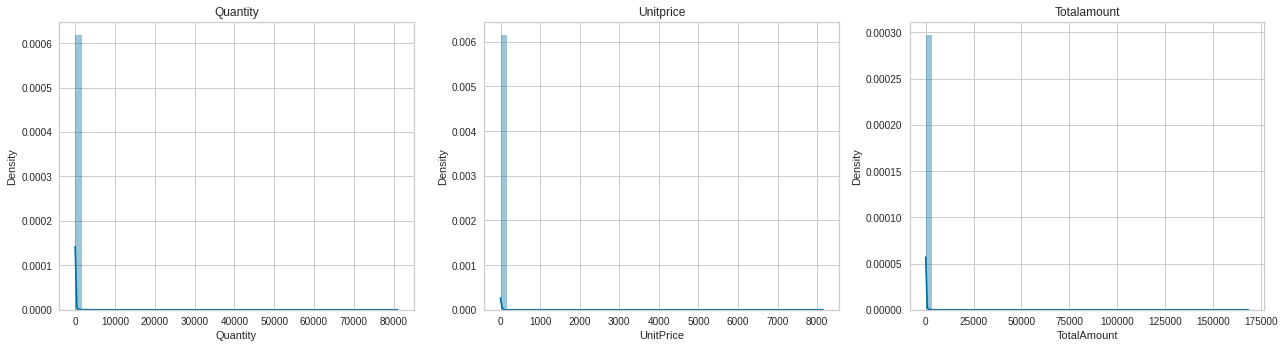

In [29]:
#Columns to analyse distribution
cols = ['Quantity','UnitPrice','TotalAmount']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(data[col])
  plt.title(col.title())
  plt.tight_layout()

* We can see that the 'Quantity', 'UnitPrice', 'TotalAmount' are all positively skewed.(mean > median > mode)
* Ideally we these features must be symmetric.(mean = median = mode)
* For this we must apply some kind of transformation to make these distributions close symmetric.
* Here, we will encorporate logarithmic transformation.

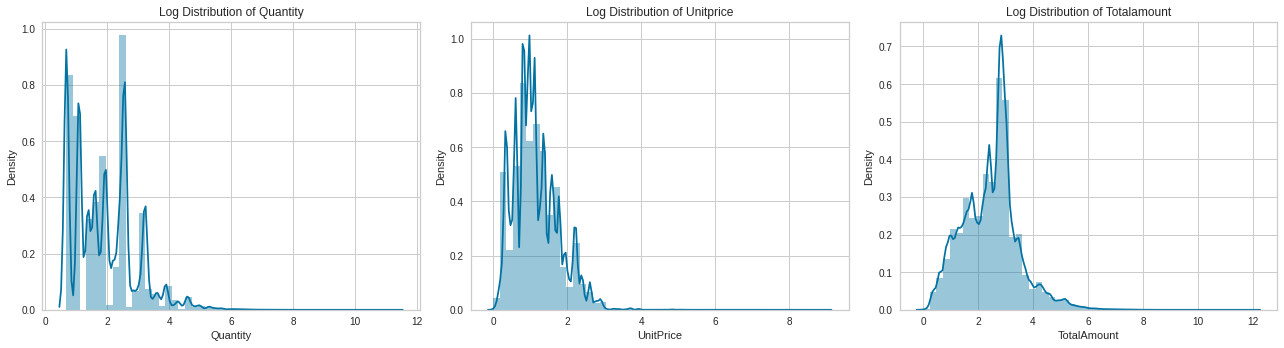

In [30]:
#Columns to analyse distribution
cols = ['Quantity','UnitPrice','TotalAmount']

#Plotting the distribution of log transformed features 
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(np.log1p(data[col]))
  plt.title(f'Log Distribution of {col.title()}')
  plt.tight_layout()

##Product Wise Analysis

###Top and Bottom Products (Based on Frequency of Purchase)
We will explore the products and see the top and bottom five products based on their frequency.

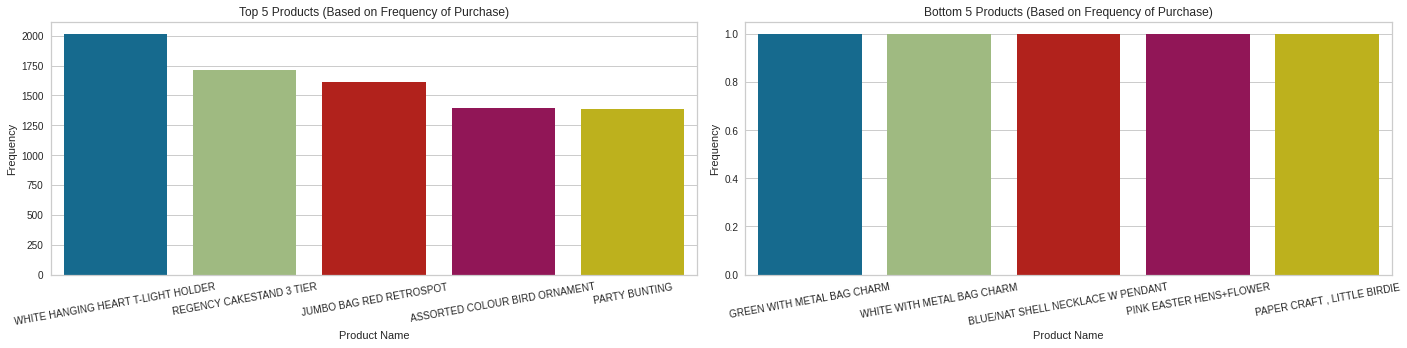

In [31]:
#Creating a dataframe that gives the product names and the count of their transactions
prod_count = data['Description'].value_counts().reset_index()

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='index', y='Description',data = prod_count[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='Top 5 Products (Based on Frequency of Purchase)', xlabel='Product Name', ylabel='Frequency')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='index', y='Description',data = prod_count[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='Bottom 5 Products (Based on Frequency of Purchase)', xlabel='Product Name', ylabel='Frequency')
plt.tight_layout()

###Top and Bottom Products (Based on Quantity of Purchase)

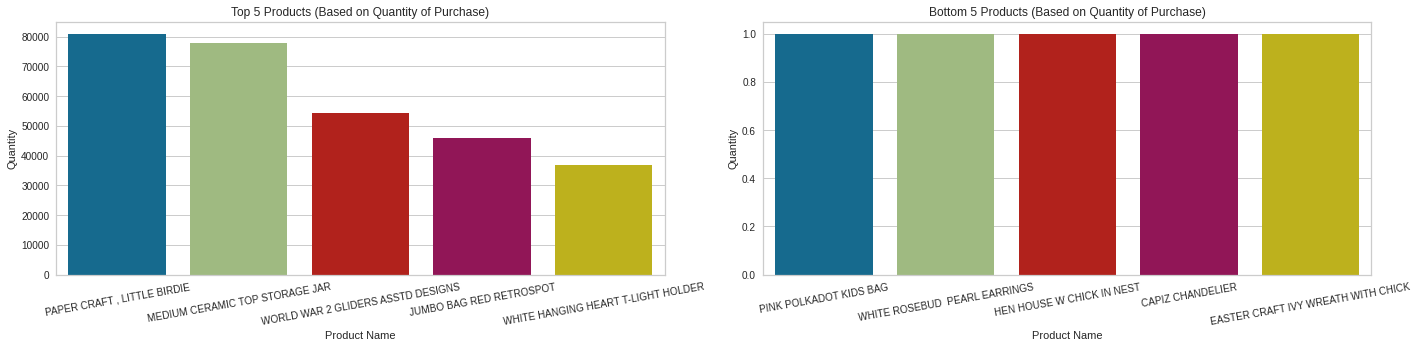

In [32]:
#Creating a dataframe that gives the product names and the quantity of their purchases
prod_qty = data.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Description', y='Quantity',data = prod_qty[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='Top 5 Products (Based on Quantity of Purchase)', xlabel='Product Name', ylabel='Quantity')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Description', y='Quantity',data = prod_qty[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='Bottom 5 Products (Based on Quantity of Purchase)', xlabel='Product Name', ylabel='Quantity')
plt.tight_layout()

###Most Expensive and Cheapest Products per Unit

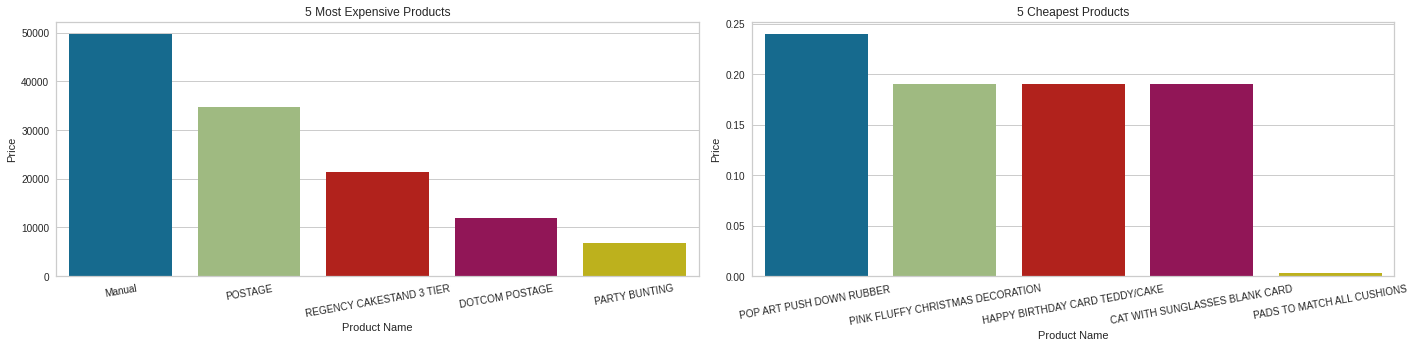

In [33]:
#Creating a dataframe that gives the product names with their unit price
prod_price = data.groupby("Description").sum()["UnitPrice"].reset_index().sort_values("UnitPrice",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Description', y='UnitPrice',data = prod_price[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='5 Most Expensive Products', xlabel='Product Name', ylabel='Price')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Description', y='UnitPrice',data = prod_price[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='5 Cheapest Products', xlabel='Product Name', ylabel='Price')
plt.tight_layout()

###Top and Bottom Products (Based on Total Revenue)

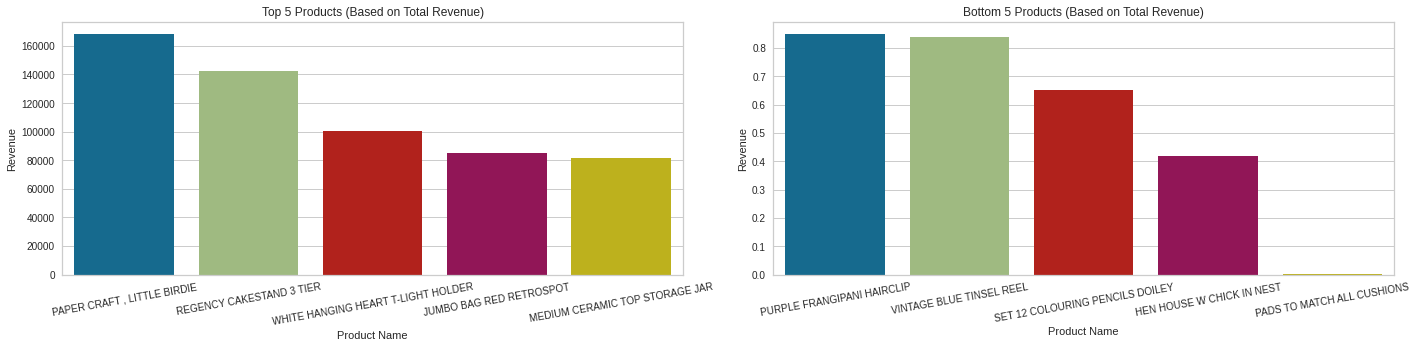

In [34]:
#Creating a dataframe that gives the product names and their total revenue
prod_rev = data.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Description', y='TotalAmount',data = prod_rev[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='Top 5 Products (Based on Total Revenue)', xlabel='Product Name', ylabel='Revenue')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Description', y='TotalAmount',data = prod_rev[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='Bottom 5 Products (Based on Total Revenue)', xlabel='Product Name', ylabel='Revenue')
plt.tight_layout()

##Transactions w.r.t Date and Time

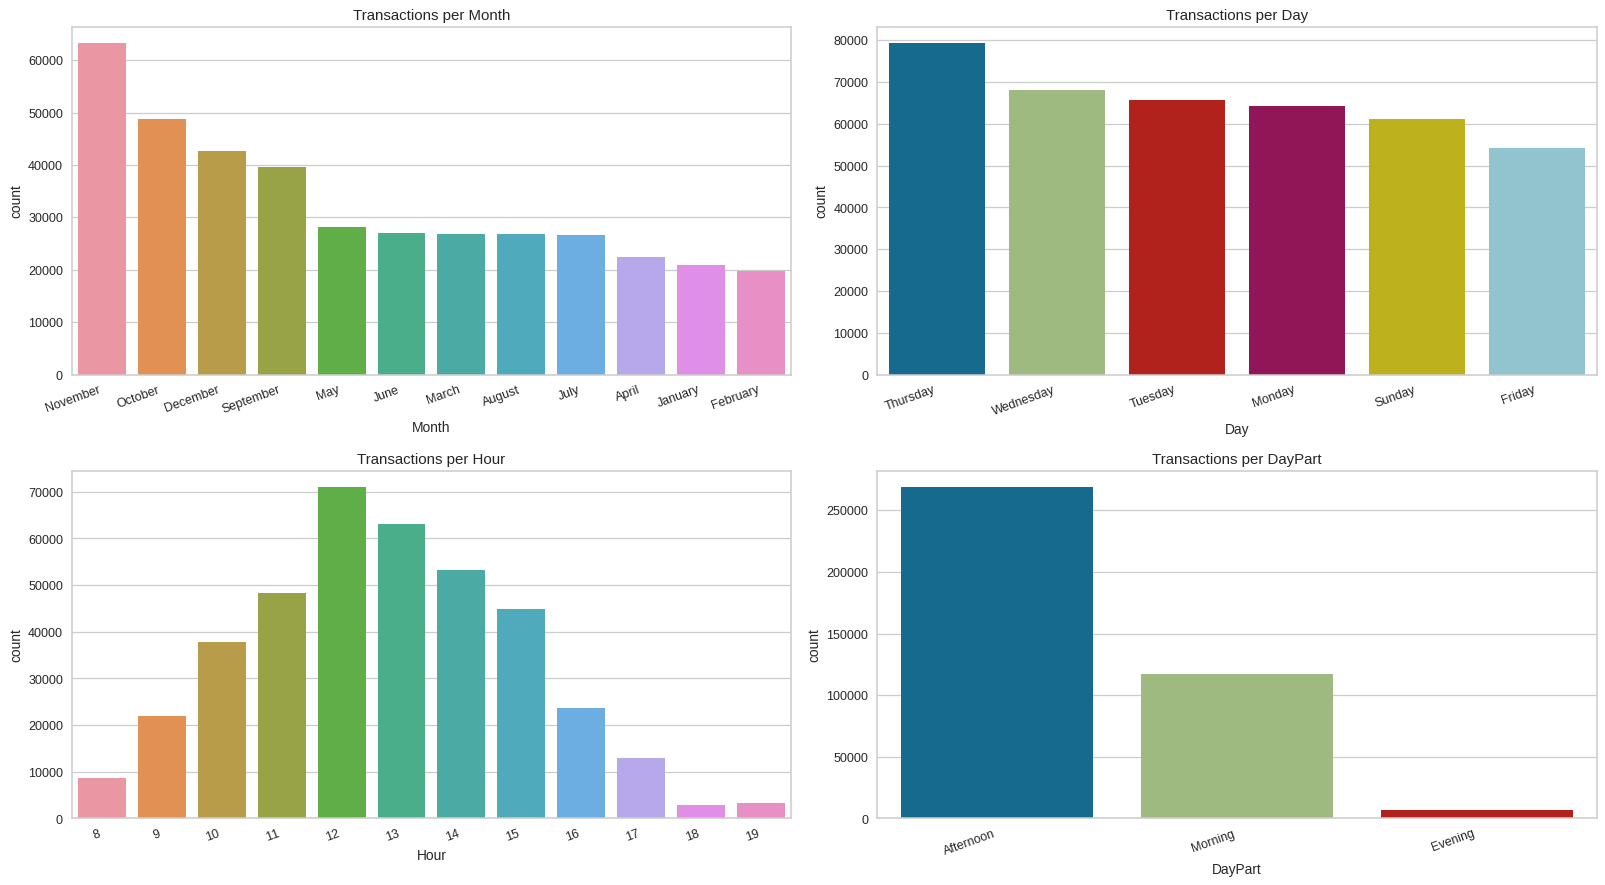

In [35]:
#Instantiate list of features to analyse
dt_features = ['Month', 'Day', 'Hour', 'DayPart']

#Plot these features
plt.figure(figsize=(18,10), dpi=90)
for n,col in enumerate(dt_features):
  plt.subplot(2, 2, n+1)
  temp = data[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.title(f'Transactions per {col}')
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

##Location Based Analysis

###Top and Bottom Countries (Based on Number of Transactions)

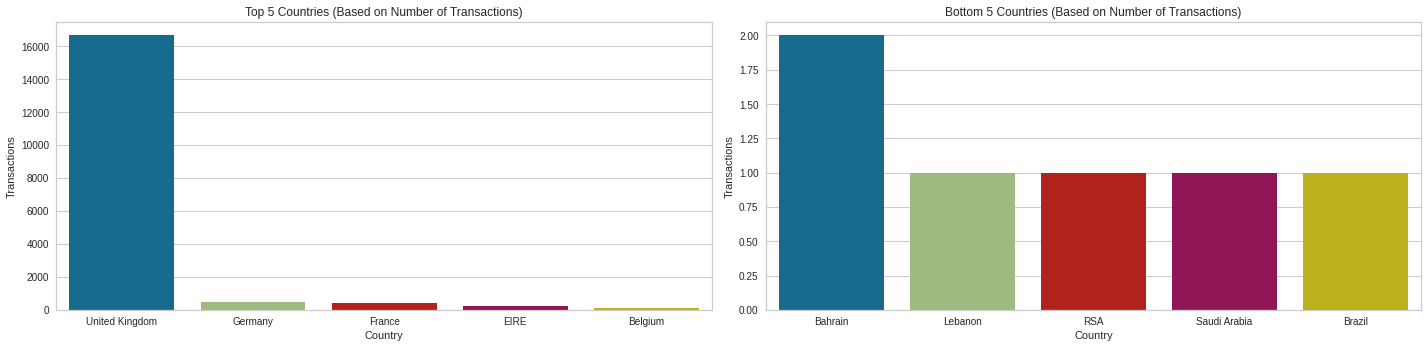

In [36]:
#Creating a dataframe that gives the country names and the count of their transactions
Country_transac = data.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Country', y='InvoiceNo',data = Country_transac[:5])
g1.set(title='Top 5 Countries (Based on Number of Transactions)', xlabel='Country', ylabel='Transactions')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Country', y='InvoiceNo',data = Country_transac[-5:])
g2.set(title='Bottom 5 Countries (Based on Number of Transactions)', xlabel='Country', ylabel='Transactions')
plt.tight_layout()

###Top and Bottom Countries (Based on Number of Customers)

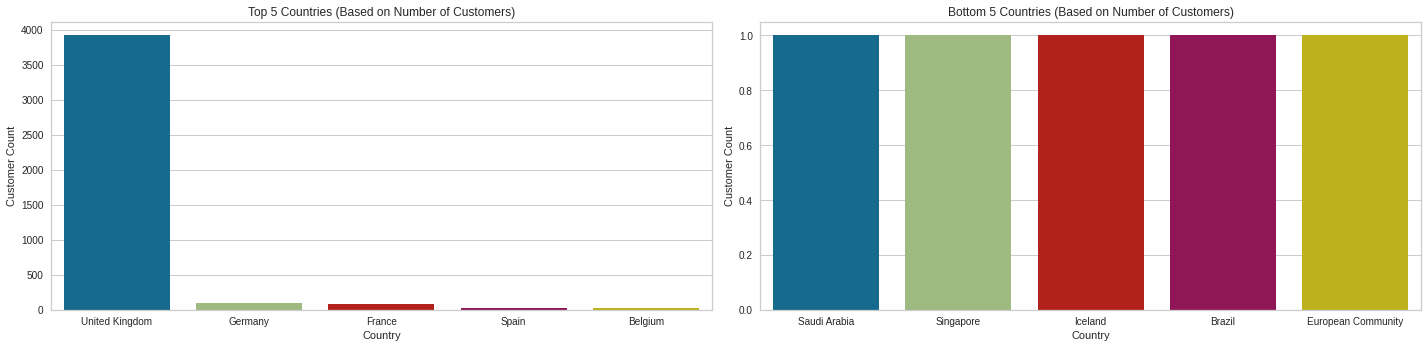

In [37]:
#Creating a dataframe that gives the country names and the count of the customers
country_cust = data.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Country', y='CustomerID',data = country_cust[:5])
g1.set(title='Top 5 Countries (Based on Number of Customers)', xlabel='Country', ylabel='Customer Count')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Country', y='CustomerID',data = country_cust[-5:])
g2.set(title='Bottom 5 Countries (Based on Number of Customers)', xlabel='Country', ylabel='Customer Count')
plt.tight_layout()

###Top and Bottom Countries (Based on Quantities Ordered)



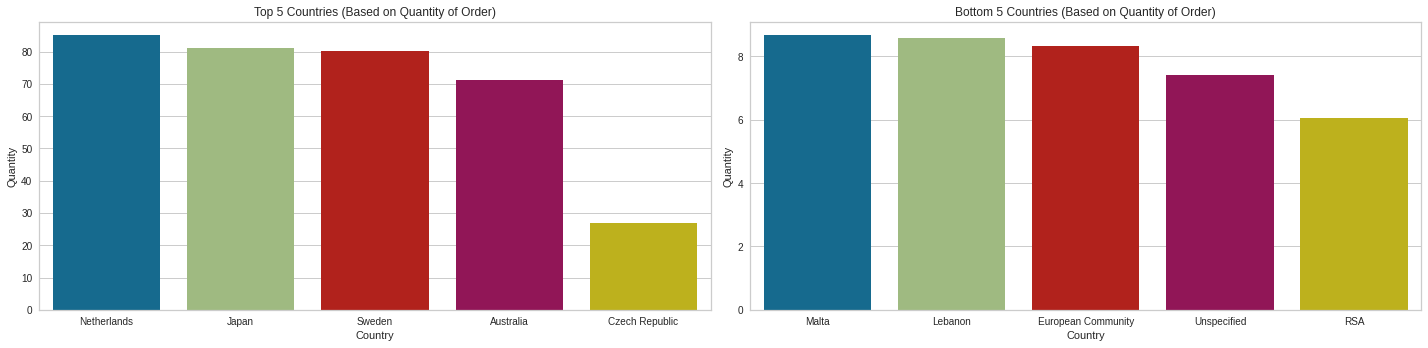

In [38]:
#Creating a dataframe that gives the country names and the quantity ordered
country_qty = data.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Country', y='Quantity',data = country_qty[:5])
g1.set(title='Top 5 Countries (Based on Quantity of Order)', xlabel='Country', ylabel='Quantity')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Country', y='Quantity',data = country_qty[-5:])
g2.set(title='Bottom 5 Countries (Based on Quantity of Order)', xlabel='Country', ylabel='Quantity')
plt.tight_layout()

###**Observations**

* Observations from the eda

#RFM Analysis

**Recency, Frequency, Monetary** value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: 
* **Recency**: How recently a customer has made a purchase
* **Frequency**: How often a customer makes a purchase. 
* **Monetary Value**: How much money a customer spends on



**Performing RFM Segmentation and RFM Analysis:**

* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

*This approach does not require machine learning algorithms as segmentation can be done manually.*

##Creating RFM Dataframe

We will formulate the RFM dataset as follows
* Recency = Latest Date - Last Invoice Data
* Frequency = Count of invoice no. of transaction(s)
* Monetary = Sum of total amount for each customer

In [39]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create Recency-Frequency-Monetary Modelling scores for each customer
rfm_df = data.groupby('CustomerID').agg(
                                      {'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                       'InvoiceNo': lambda x: len(x), 
                                       'TotalAmount': lambda x: x.sum()}
                                        )

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


##Getting R, F, and M scores

We will now get the individual scores for R, F and M by splitting Recency, Frequency	and Monetary values into 4 buckets based on their quantiles.

In [40]:
#Applying quantile cut method to saperate the column values based on their quantiles and assign labels
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


##Getting the RFM groups and scores for each customer

* We will group the R, F and M values to get the groups for each customer.
  * Explaination:
    * **Best Customer** - If a customer belongs to group **444**, they have made a purchase very recently and has high frequency and monetary value. 
    * **Worst Customer** - If a customer belongs to group **111**, it means made a purchase a long time ago and has low frequency and monetary value.

* We will give every customer an RFM score based on their individual R, F and M values.
  * Explaination:
    * **Best Customer** - High RFM Score
    * **Worst Customer** - Low RFM Score    

In [41]:
#Getting RFM groups
rfm_df['RFM_Group'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Getting RFM scores
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12347.0,2,182,4310.00,4,4,4,444,12
2,12348.0,75,31,1797.24,2,2,4,224,8
3,12349.0,18,73,1757.55,3,3,4,334,10
4,12350.0,310,17,334.40,1,1,2,112,4


##Distribution of Recency, Frequency and Monetary Features

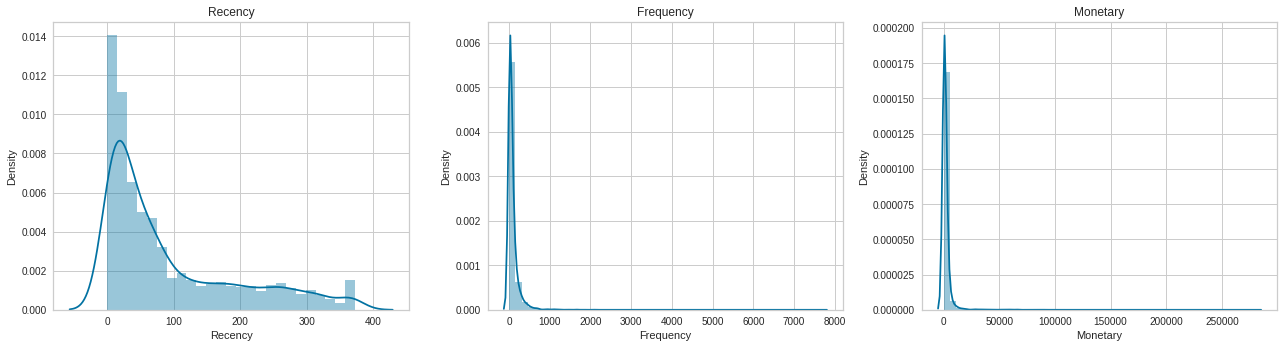

In [42]:
#Columns to analyse distribution
cols = ['Recency', 'Frequency',	'Monetary']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_df[col])
  plt.title(col.title())
  plt.tight_layout()

* The distributions all look skewed towards right.
* We can transform these features to make the distributions as close to a normal distributio as possible.
* We will apply log transformation here

In [43]:
#Replacing all the zero values to 1 to run the transformation without a hassle
rfm_df.replace(0.0,1,inplace=True)

#Applying Log transformation
rfm_df['Recency_Log']   = rfm_df['Recency'].apply(np.log)
rfm_df['Frequency_Log'] = rfm_df['Frequency'].apply(np.log)
rfm_df['Monetary_Log']  = rfm_df['Monetary'].apply(np.log)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
0,12346.0,325,1,77183.60,1,1,4,114,6,5.783825,0.000000,11.253942
1,12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693
2,12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007
3,12349.0,18,73,1757.55,3,3,4,334,10,2.890372,4.290459,7.471676
4,12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338


Let's look at the distribution of the transformed features.

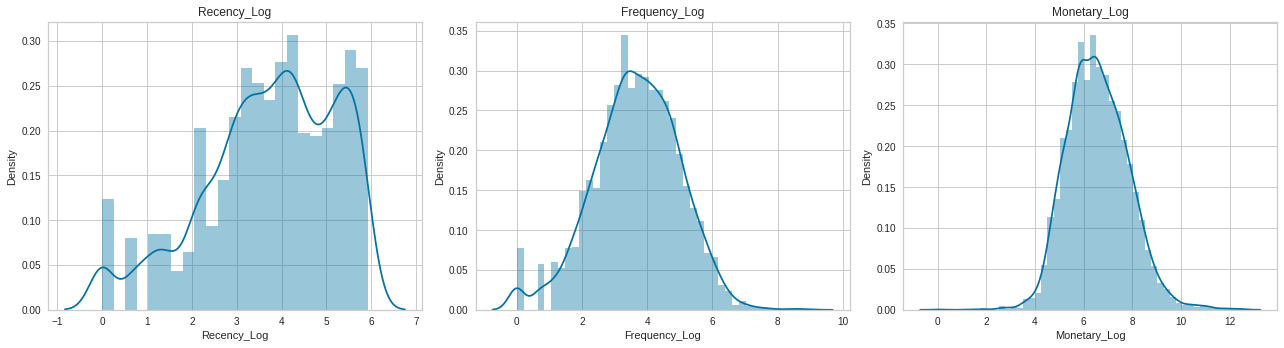

In [44]:
#Columns to analyse distribution
cols = ['Recency_Log', 'Frequency_Log',	'Monetary_Log']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_df[col])
  plt.title(col.title())
  plt.tight_layout()

###**Observations**

* Observations from the rfm analysis

#Model Building

Before jumping into building the model, there are a few more steps that we must execute. These are:
* Defining Feature Matrix (X)
* Feature Scaling 

##Prerequisites

###Defining Feature Matrix
We will be using the log transformed values of Recency, Frequency and Monetary values

In [45]:
#X is the dataframe we will build our model
X = rfm_df[['Recency_Log','Frequency_Log','Monetary_Log']]

###Feature Scaling
We will use StandardScaler for feature scaling

In [46]:
#Fitting StandardScalar on the feature matrix to standardise the data
X = StandardScaler().fit_transform(X)

###Helper Function
We will define a helper function that gives us the results, visualisation and summary for each applied model


In [47]:
# Initializing an empty dictionary to store the stats and summary for all clusters 
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})
  
  # Changing the name for the columns 
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

# Defining a function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm_df[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm_df[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm_df,segment_name) 

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18, 18), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm_df[rfm_df[segment_name]==i][col], overlap_supress),ax=ax[index] ,kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight ='bold')  # Setting the main title
      ax[index].legend(groups,prop={'size': 15})                      # Assiging legends for all the axes
  plt.show()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDiscriptive Statistics for each segment:\n')
  display(stats.reset_index().style.hide_index().background_gradient())
  print('\n\nCluster Discription:\n')
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient())

  return stats, summary

## Heuristic Models

###Segmentation Using RMF_Score

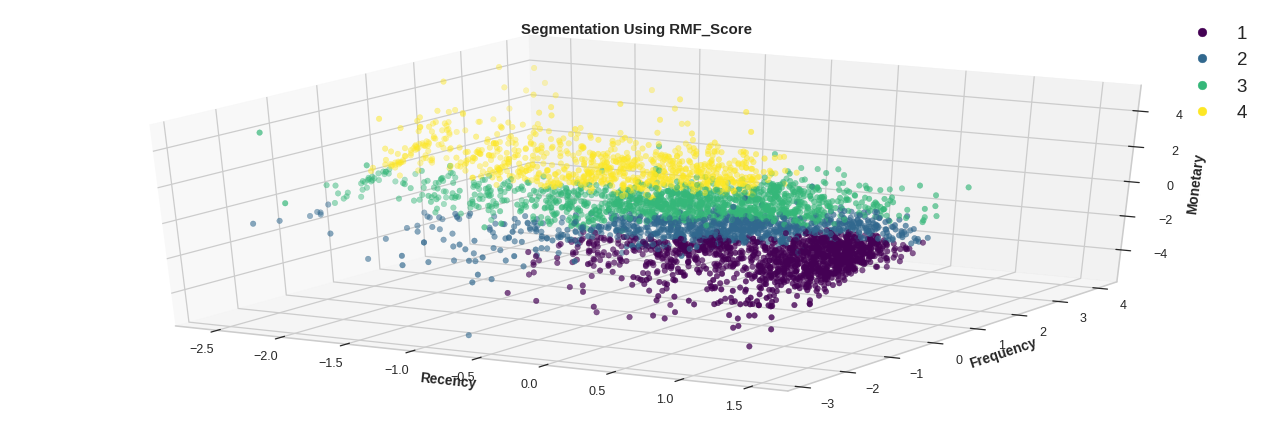

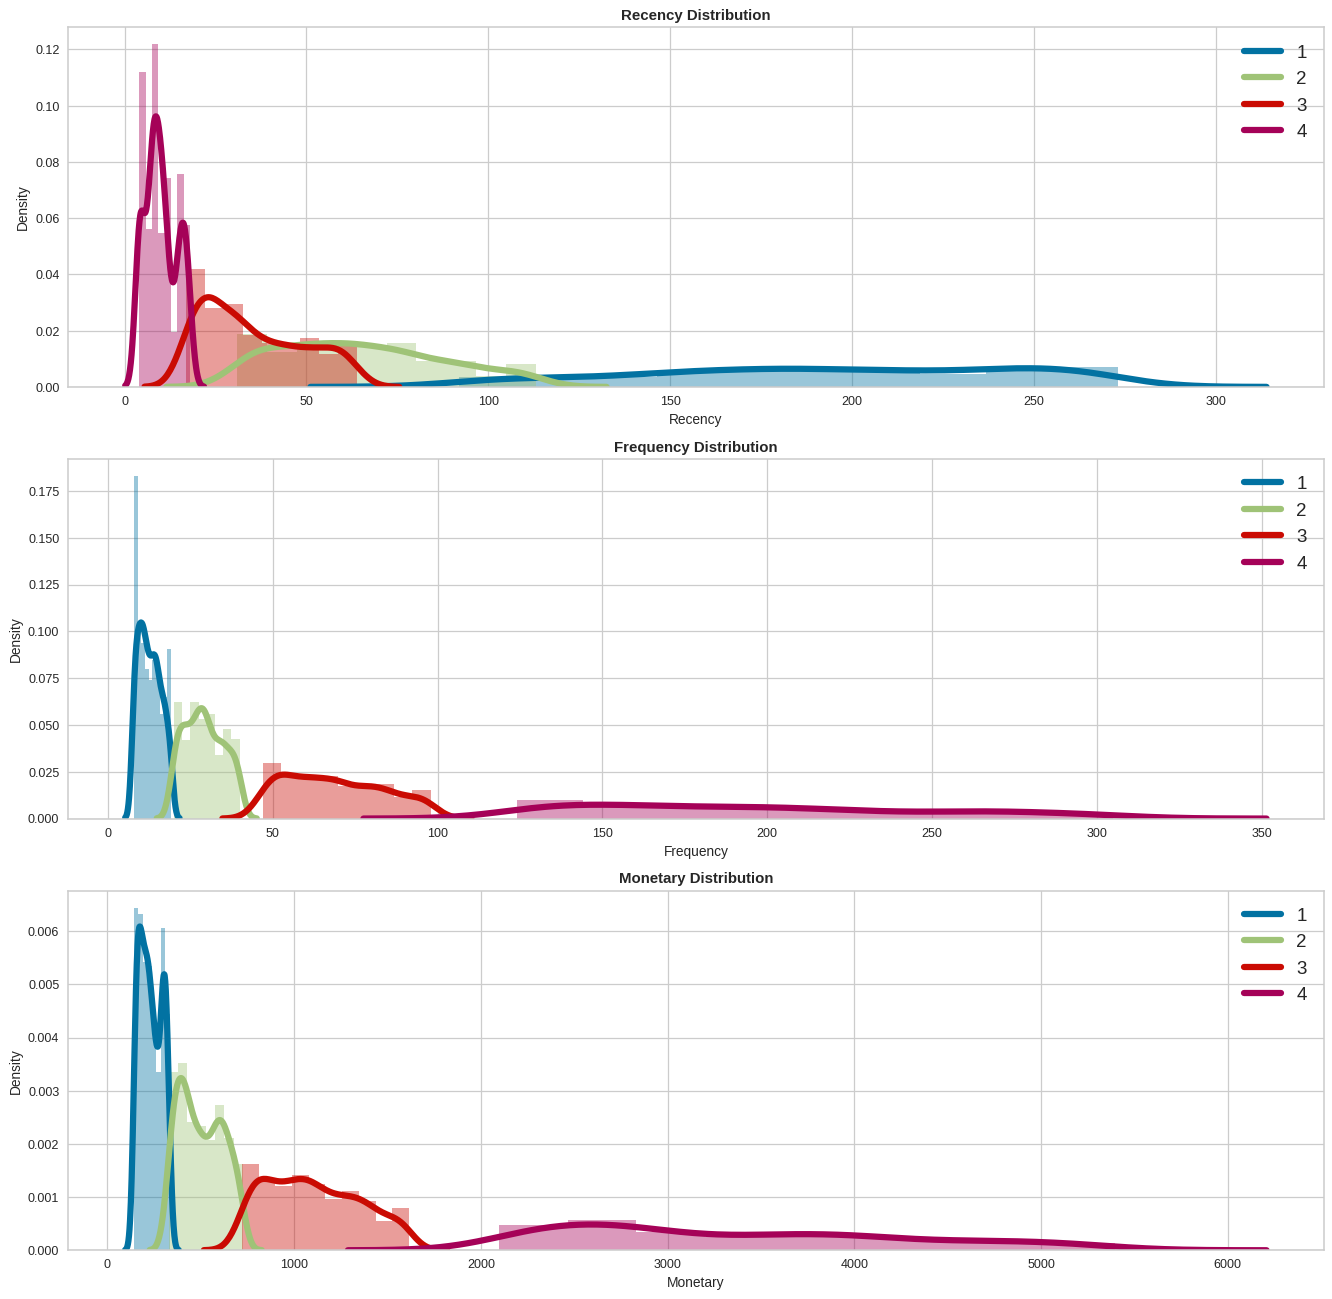



Discriptive Statistics for each segment:



RMF,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
1,191.181255,196.000000,15.040279,12.000000,266.465648,225.850000,1291
2,87.356209,63.000000,33.026144,29.000000,790.243182,491.040000,918
3,47.344641,31.000000,81.417887,67.000000,1601.348359,1079.610000,1297
4,13.192077,9.000000,284.991597,191.000000,6891.729508,3170.980000,833




Cluster Discription:



RMF,Last_visited,Purchase_frequency,Money_spent
1,91 to 273 days ago,Bought 7 to 20 times,Spent around 142 to 335 Sterling
2,30 to 113 days ago,Bought 19 to 41 times,Spent around 328 to 725 Sterling
3,16 to 65 days ago,Bought 46 to 99 times,Spent around 720 to 1618 Sterling
4,3 to 19 days ago,Bought 123 to 306 times,Spent around 2093 to 5411 Sterling


In [48]:
#Getting 4 clusters using RFM_Score
y = pd.qcut(rfm_df['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

#Plotting the Results
title = 'Segmentation Using RMF_Score'
segment_name = 'RMF'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

## ML Models

###K-Means Clustering

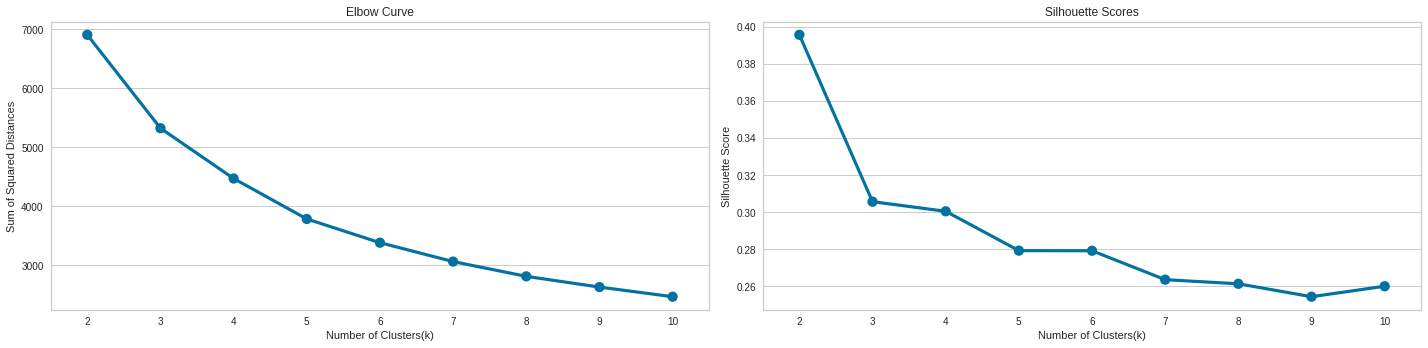

In [49]:
#Empty lists to store Sum of Squared Distance and Silhouette Score for each cluster in k clusters
ssd,sil_score = [],[]

#Instantiating a list of clusters
n_clusters = list(range(2,11))

#Applying K-Means to each cluster in the list of clusters
for k in n_clusters:
    k_means = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    #Fitting the model
    y_preds = k_means.fit_predict(X)
    # Appending the inertia                                          
    ssd.append(k_means.inertia_)
    # Appending the silhoutte score                                              
    sil_score.append(silhouette_score(X, y_preds))                             

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting the Elbow Curve
elbow = sns.pointplot(ax = axes[0], x=n_clusters, y=ssd)   
elbow.set(title='Elbow Curve', xlabel='Number of Clusters(k)', ylabel='Sum of Squared Distances')

#Plotting the Silhouette Scores
sil = sns.pointplot(ax = axes[1], x=n_clusters, y=sil_score)   
sil.set(title='Silhouette Scores', xlabel='Number of Clusters(k)', ylabel='Silhouette Score')
plt.tight_layout()

* We have considered the elbow curve and to start with 2 as the minimum number of clusters and calculated their respective silhouette scores.
* 5 appears to be the elbow, looking at the elbow curve.
* Silhouette score for 2 clusters is the highest 
* Considering the tradeoff between the two plots we can also consider 4 to be the optimal number of clusters.

####Visualising Silhouette Analysis for n-clusters

We will get the SilhouSilhouette Analysis Visualisation for the number of clusters between 2 to 5 on a sample of the data.

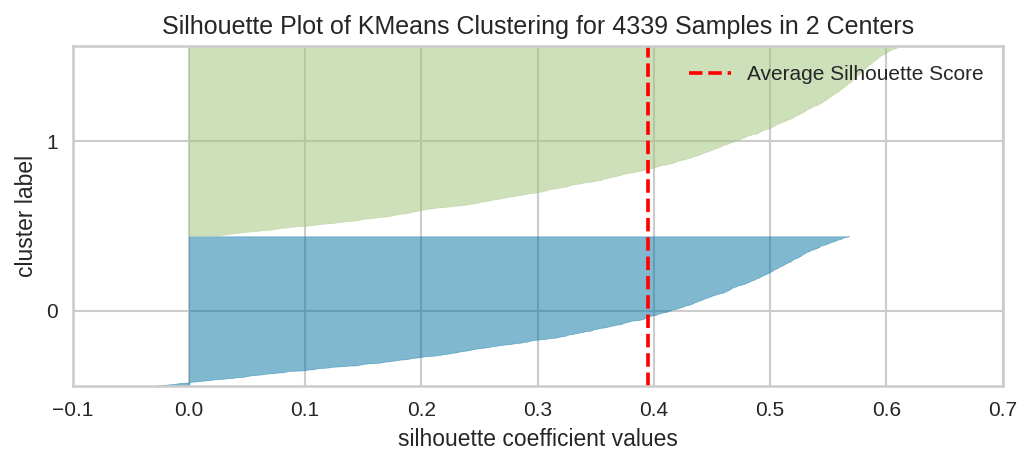

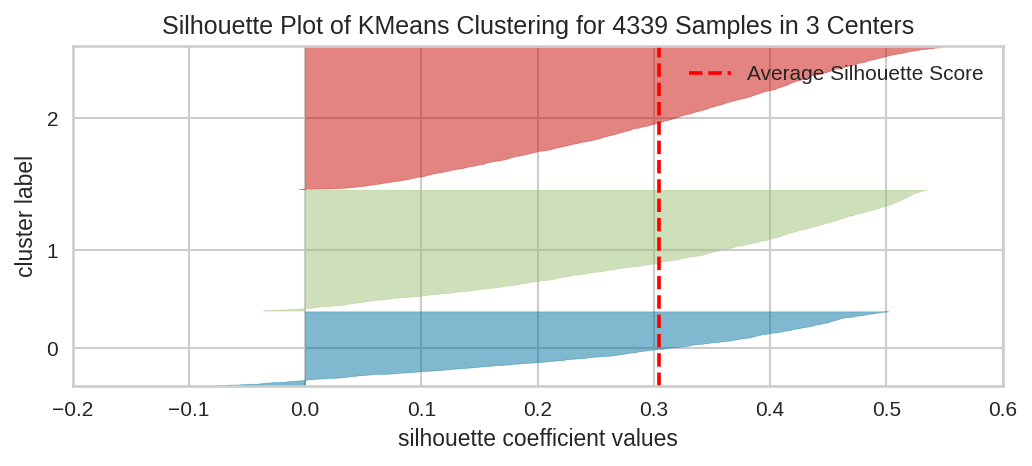

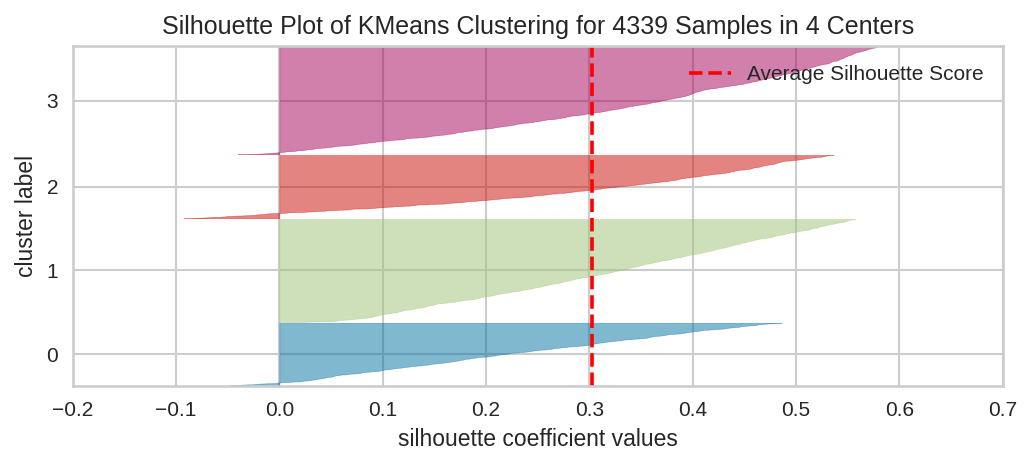

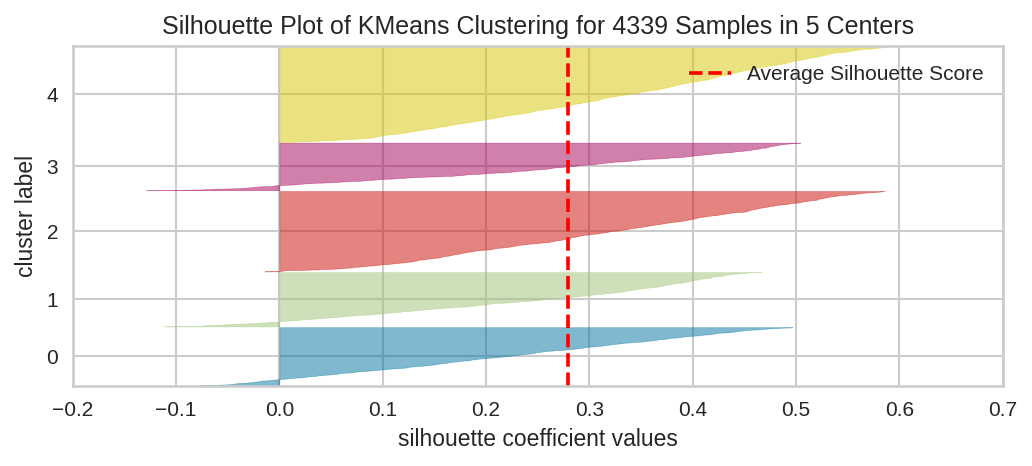

In [50]:
# Visualizing the Silouette plots for the clusters
for i in range(2,6):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    sil_vis=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    sil_vis.fit(X)
    sil_vis.show()

####K-Means clustering based on Elbow Curve Results

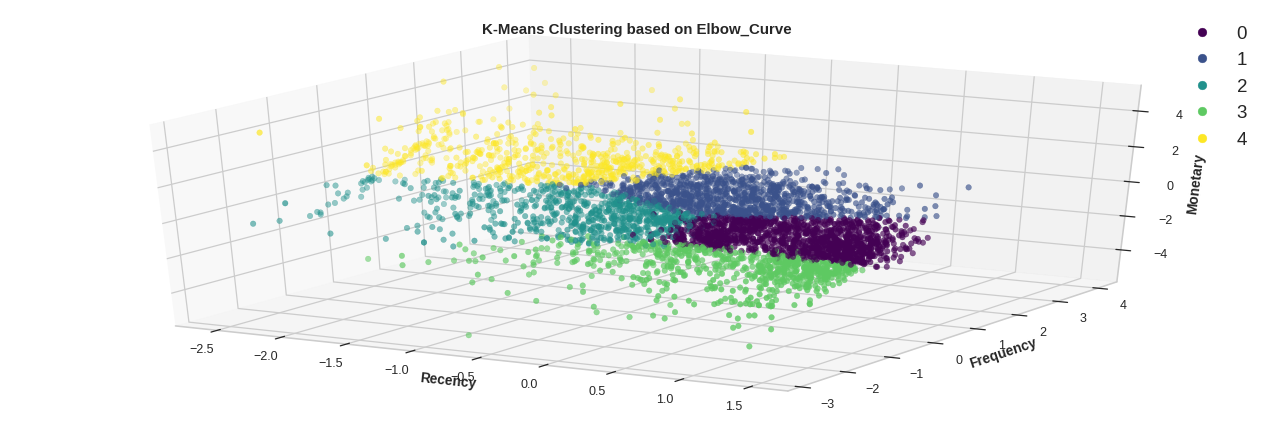

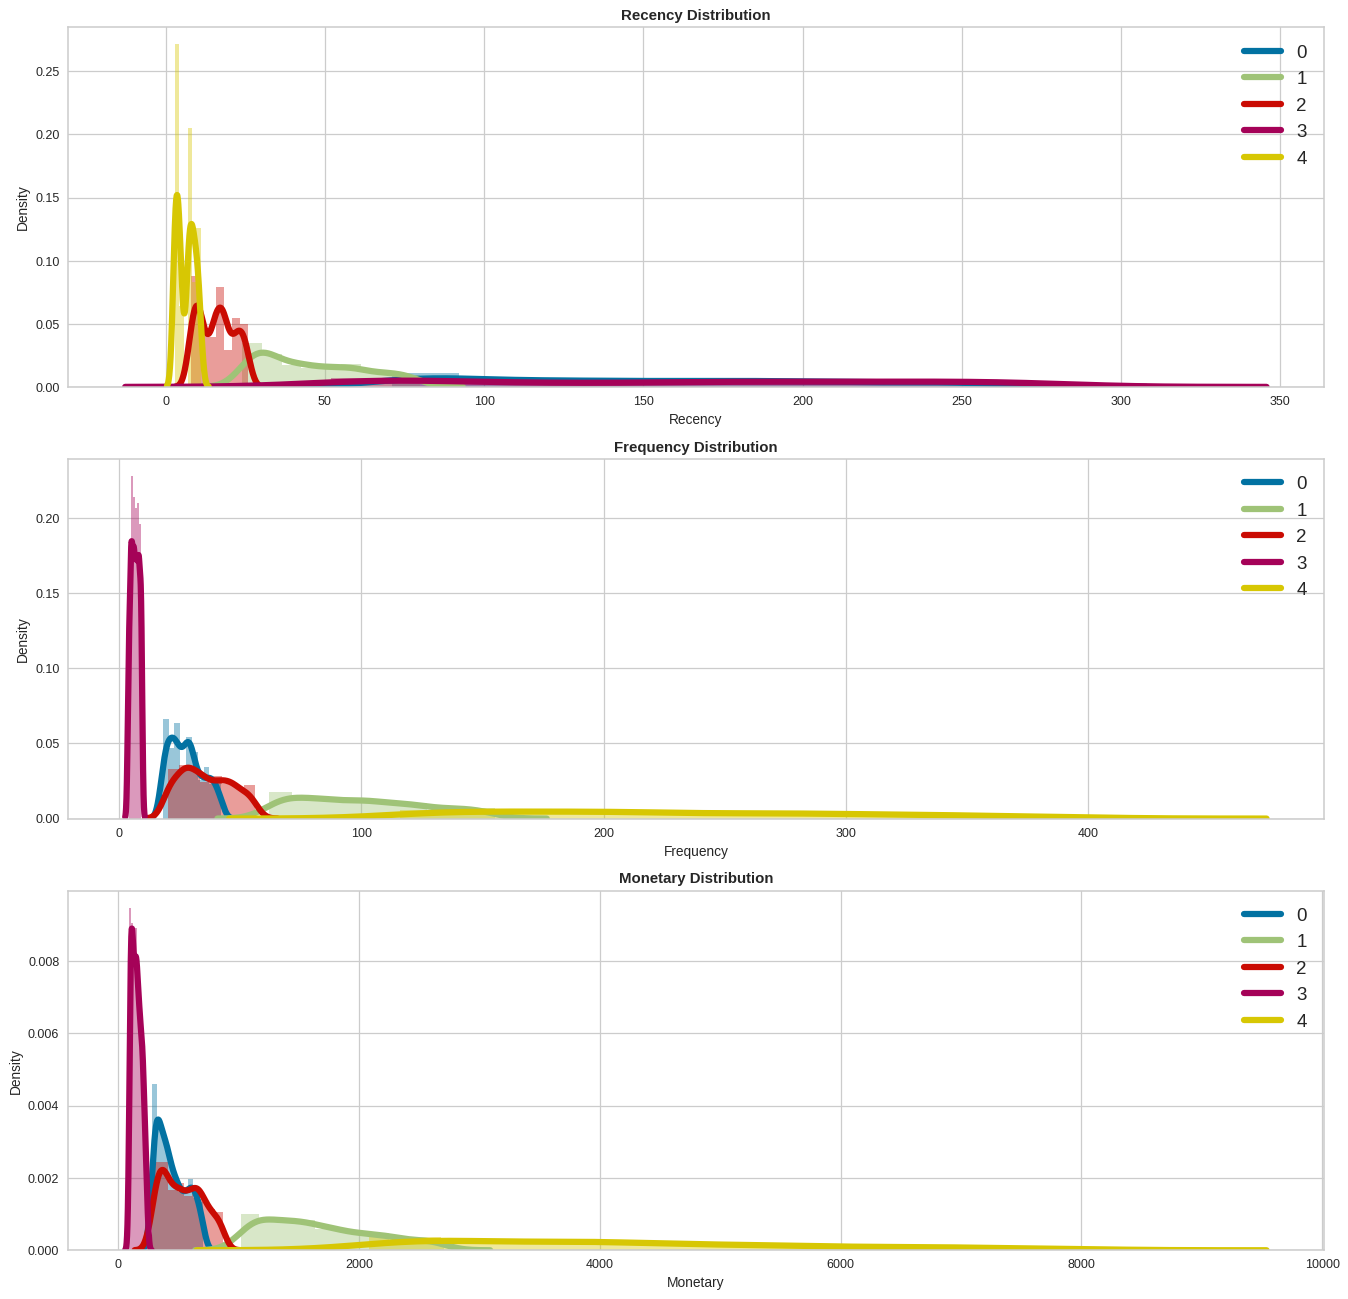



Discriptive Statistics for each segment:



K-Means with n=5,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,164.809135,147.000000,31.154976,27.000000,527.786682,419.085000,1226
1,59.233654,43.000000,114.920192,98.000000,2122.224674,1582.700000,1040
2,16.706507,16.000000,40.397078,34.000000,632.357252,523.110000,753
3,168.301565,165.000000,7.092461,7.000000,198.154780,152.650000,703
4,7.857374,5.000000,323.523501,217.000000,8780.489368,3902.280000,617




Cluster Discription:



K-Means with n=5,Last_visited,Purchase_frequency,Money_spent
0,75 to 242 days ago,Bought 18 to 39 times,Spent around 305 to 643 Sterling
1,26 to 72 days ago,Bought 67 to 142 times,Spent around 1100 to 2425 Sterling
2,8 to 24 days ago,Bought 20 to 53 times,Spent around 324 to 789 Sterling
3,60 to 264 days ago,Bought 4 to 10 times,Spent around 104 to 216 Sterling
4,2 to 10 days ago,Bought 129 to 349 times,Spent around 2330 to 6761 Sterling


In [63]:
#K-Means custering for n=5

#Instantiating K-Means with n=5
km_5 = KMeans(n_clusters=5,init="k-means++")           
#Fitting the model
y = km_5.fit_predict(X)                                
#Getting the cluster centroids
centroids = km_5.cluster_centers_                     

#Plotting the Results
title = 'K-Means Clustering based on Elbow_Curve'
segment_name = 'K-Means with n=5'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

####K-Means clustering based on Silhoette Score Results

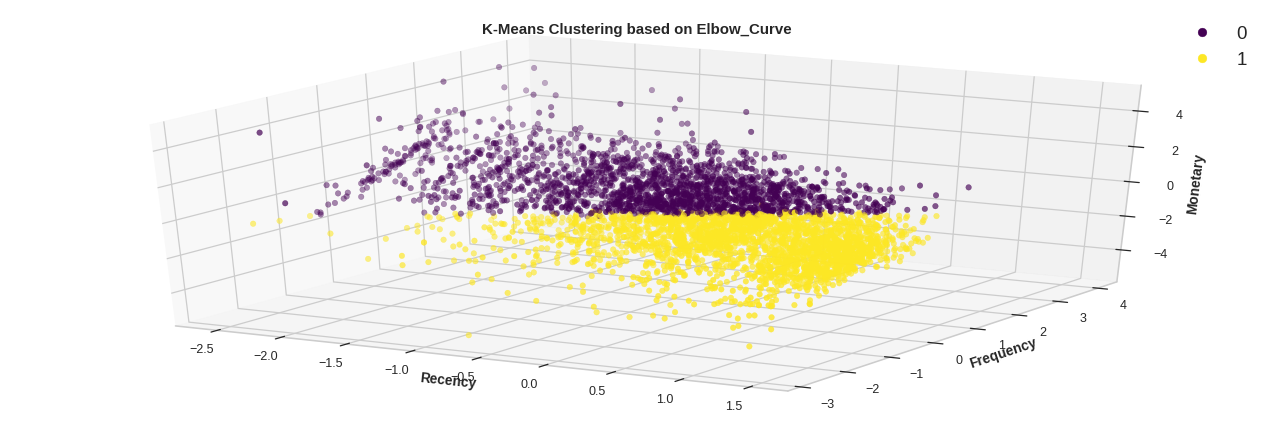

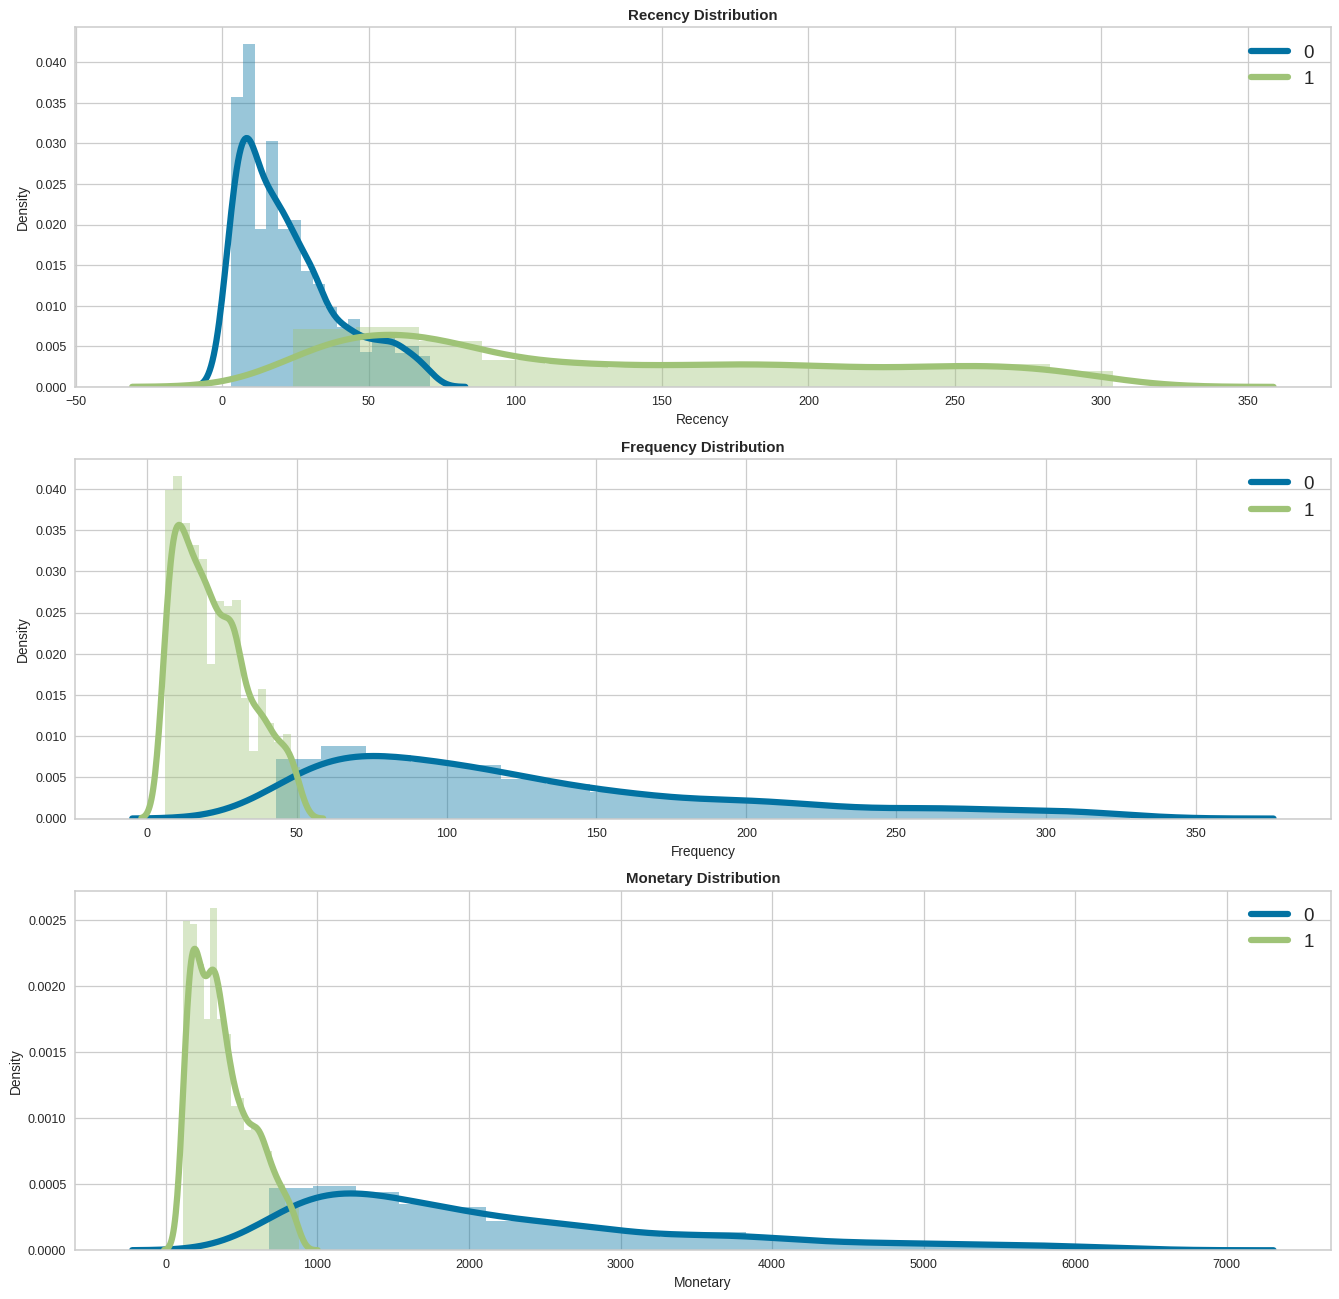



Discriptive Statistics for each segment:



K-Means with n=2,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,30.574635,18.000000,173.457203,109.000000,4044.472804,1834.705000,1916
1,140.661164,109.000000,24.922823,20.000000,469.665704,331.240000,2423




Cluster Discription:



K-Means with n=2,Last_visited,Purchase_frequency,Money_spent
0,7 to 38 days ago,Bought 67 to 192 times,Spent around 1071 to 3385 Sterling
1,50 to 225 days ago,Bought 10 to 33 times,Spent around 189 to 571 Sterling


In [64]:
#K-Means custering for n=2

#Instantiating K-Means with n=2
km_2 = KMeans(n_clusters=2,init="k-means++")           
#Fitting the model
y = km_2.fit_predict(X)                                
#Getting the cluster centroids
centroids = km_2.cluster_centers_                     

#Plotting the Results
title = 'K-Means Clustering based on Elbow_Curve'
segment_name = 'K-Means with n=2'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

####K-Means clustering based on Tradeoff between Elbow Curve and Silhoette Score Results

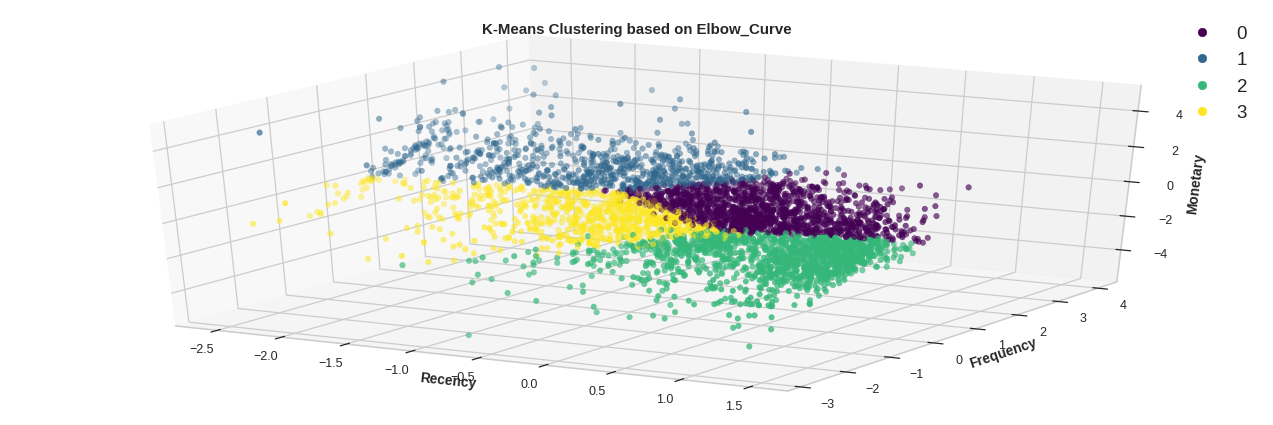

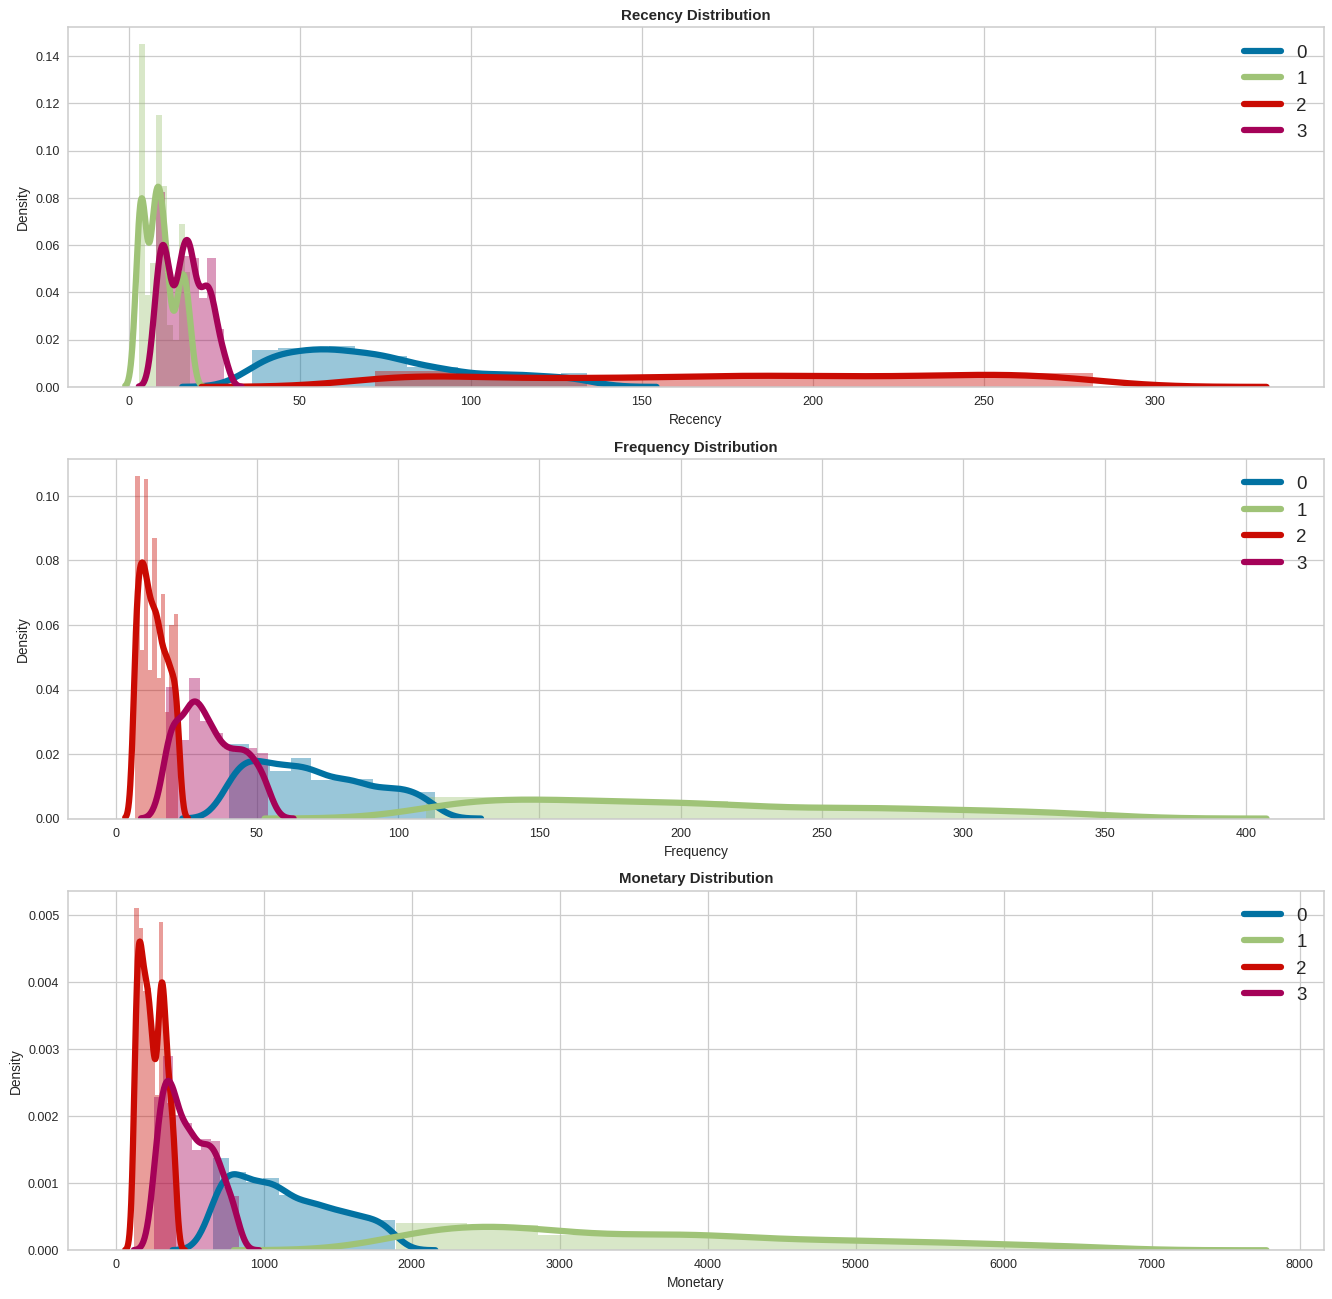



Discriptive Statistics for each segment:



K-Means with n=4,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,91.383220,67.000000,80.466364,67.000000,1515.240403,1089.180000,1323
1,11.503641,8.000000,285.623786,194.500000,7279.512755,3404.650000,824
2,182.805036,183.000000,14.844604,13.000000,295.806720,240.275000,1390
3,18.609726,17.000000,37.764339,32.000000,589.846621,468.660000,802




Cluster Discription:



K-Means with n=4,Last_visited,Purchase_frequency,Money_spent
0,40 to 116 days ago,Bought 42 to 103 times,Spent around 709 to 1707 Sterling
1,3 to 16 days ago,Bought 122 to 311 times,Spent around 2079 to 5655 Sterling
2,80 to 267 days ago,Bought 7 to 21 times,Spent around 144 to 369 Sterling
3,9 to 26 days ago,Bought 19 to 50 times,Spent around 293 to 739 Sterling


In [65]:
#K-Means custering for n=4

#Instantiating K-Means with n=4
km_4 = KMeans(n_clusters=4,init="k-means++")           
#Fitting the model
y = km_4.fit_predict(X)                                
#Getting the cluster centroids
centroids = km_4.cluster_centers_                     

#Plotting the Results
title = 'K-Means Clustering based on Elbow_Curve'
segment_name = 'K-Means with n=4'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

###Hierarchical Clustering

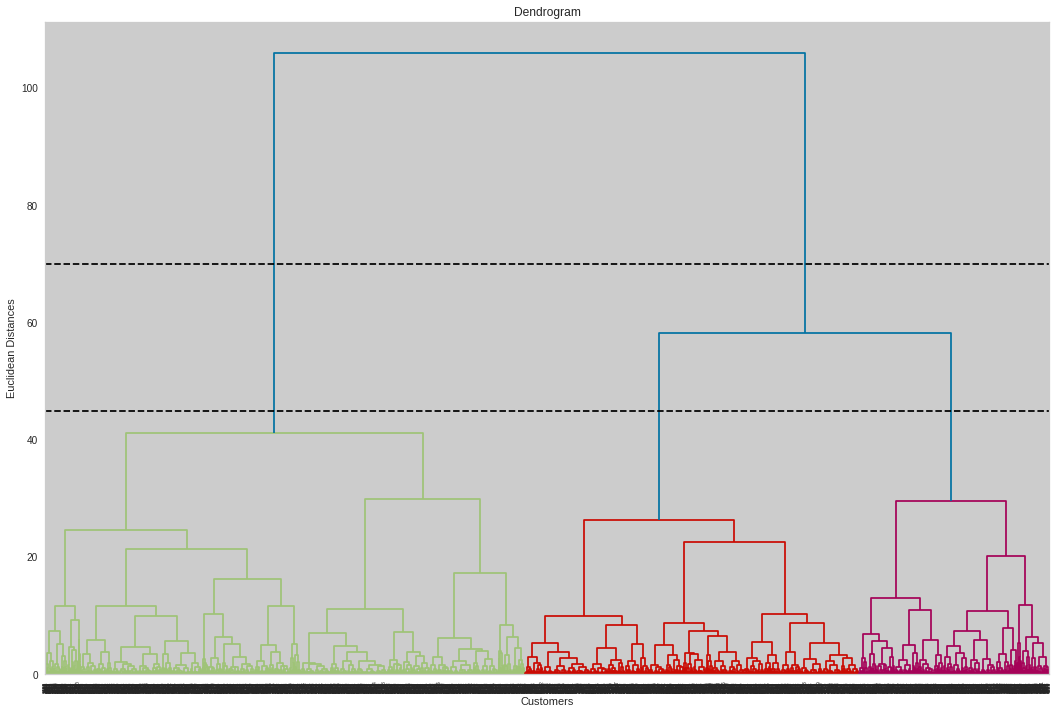

In [58]:
#Plotting Dendogram to get optimal number of clusters

#Setting plot specs
plt.figure(figsize=(18,12))

#Using Ward's Linkage Method to Differ Similarities
dendrogram(linkage(X, method='ward'), color_threshold=50)

#Setting plot parameters
plt.title('Dendrogram')                                    
plt.xlabel('Customers')                                    
plt.ylabel('Euclidean Distances')    

#Setting Threshold at y=70
plt.axhline(y=70, color='black', linestyle='--')  

#Setting Threshold at y=45
plt.axhline(y=45, color='black', linestyle='--')  
plt.show()

* We try to set the threshold in such a way that it cuts the tallest vertical line.
* Here we will try two thresholds to cut the two visibly tallest lines to get the optimal number of clusters. We chose these as y=70 and y=45.
* y=70 that gives us 2 clusters.
* y=45 that gives us 3 clusters.

####Agglomerative Hierarchical Clustering for dendogram threshold y=70

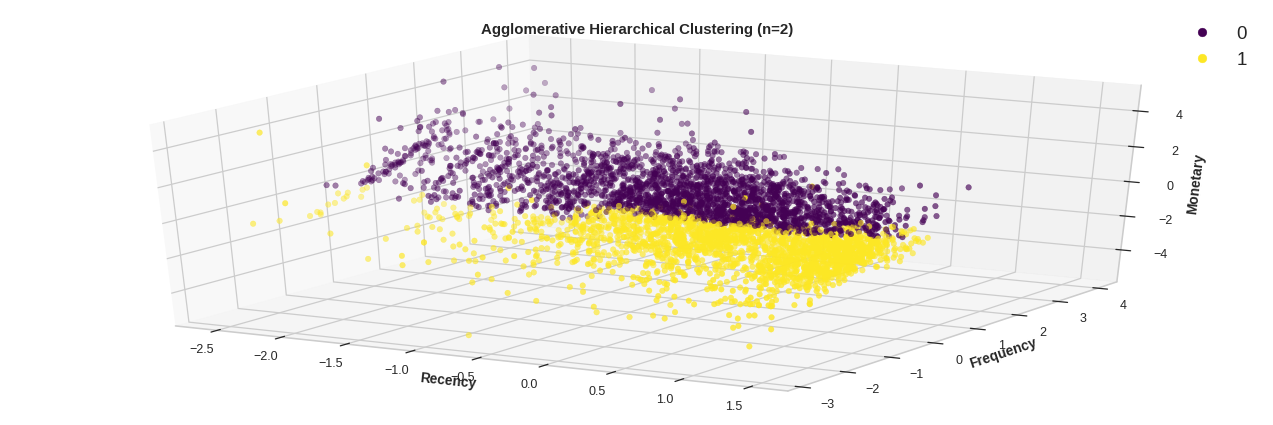

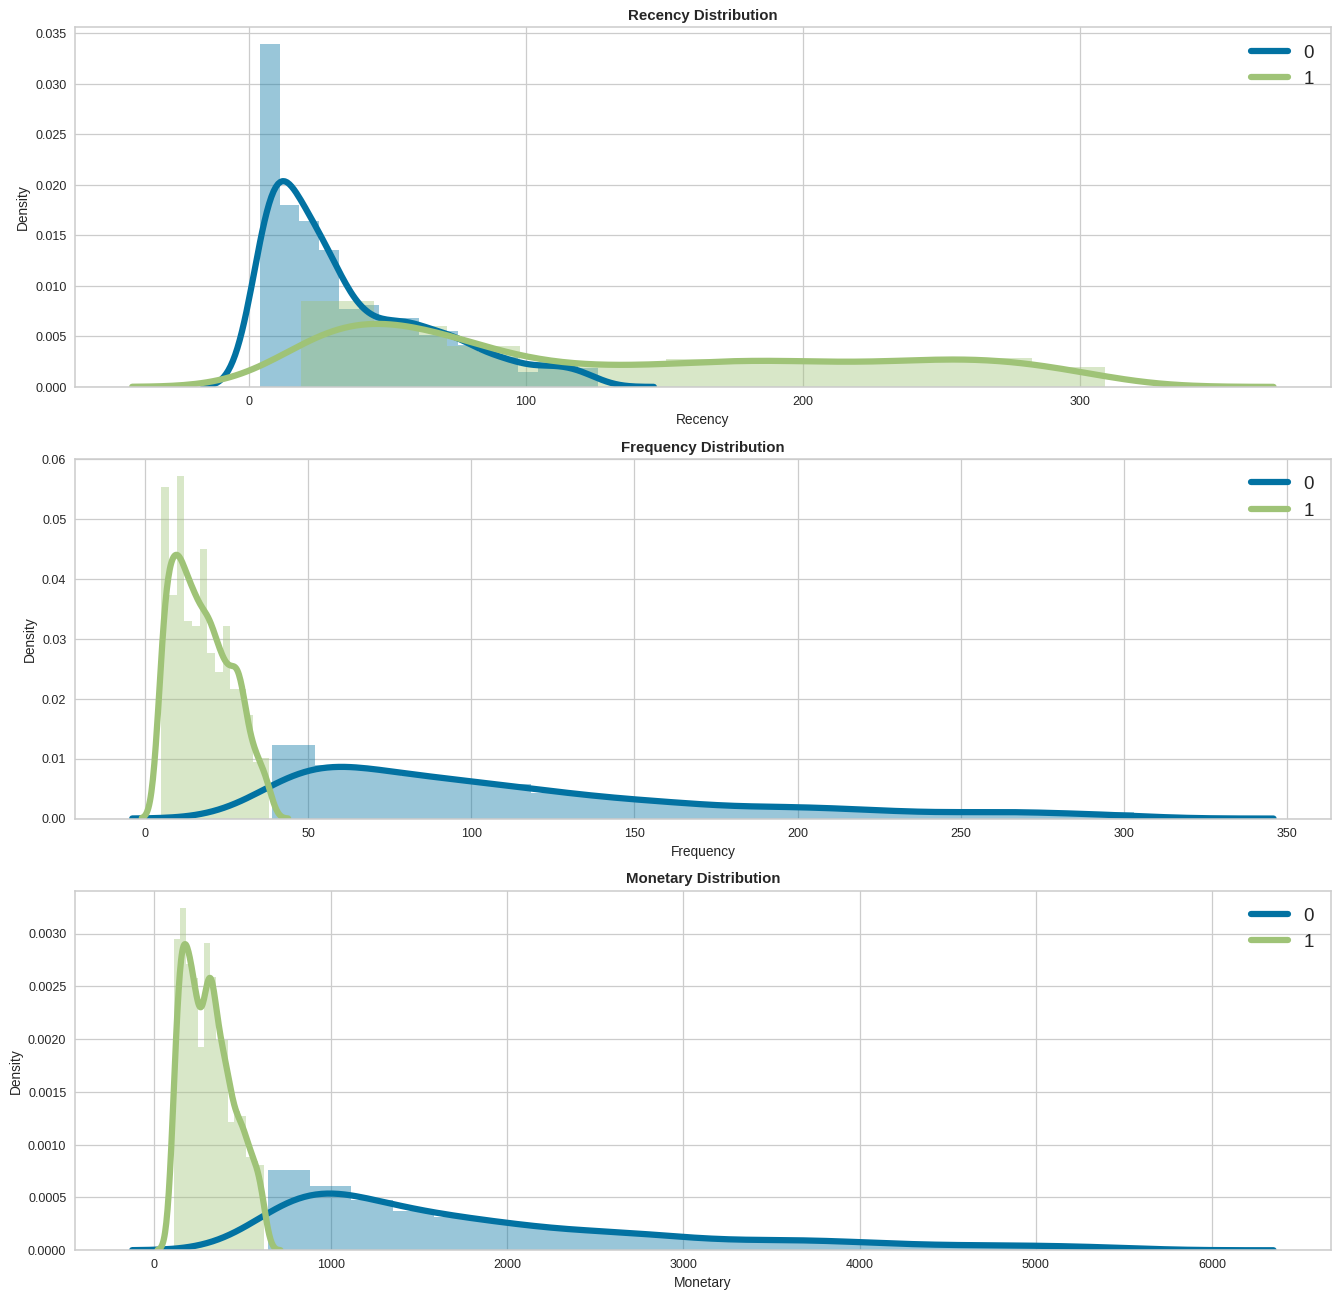



Discriptive Statistics for each segment:



AHC with n=2,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,48.522296,25.000000,155.105960,95.000000,3434.244540,1531.620000,2265
1,139.585342,102.000000,19.969624,16.000000,534.544847,300.390000,2074




Cluster Discription:



AHC with n=2,Last_visited,Purchase_frequency,Money_spent
0,9 to 65 days ago,Bought 54 to 166 times,Spent around 891 to 2863 Sterling
1,39 to 237 days ago,Bought 9 to 27 times,Spent around 171 to 439 Sterling


In [67]:
#Instantiating Agglomerative Clustering with n=2
ac_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')     
#Fitting the model
y = ac_2.fit_predict(X)                                                                

#Plotting the Results
title = 'Agglomerative Hierarchical Clustering (n=2)'                                
segment_name = 'AHC with n=2'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

####Agglomerative Hierarchical Clustering for dendogram threshold y=45

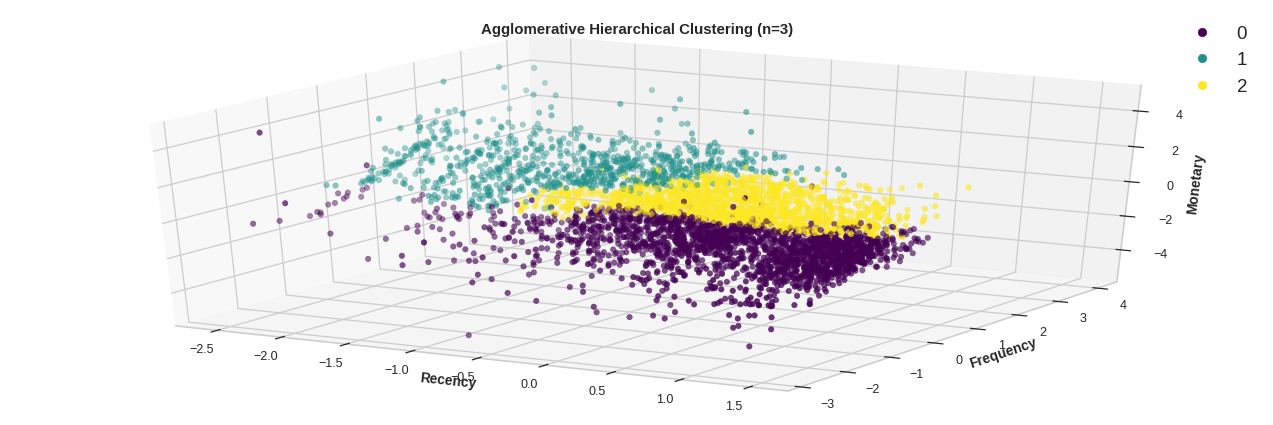

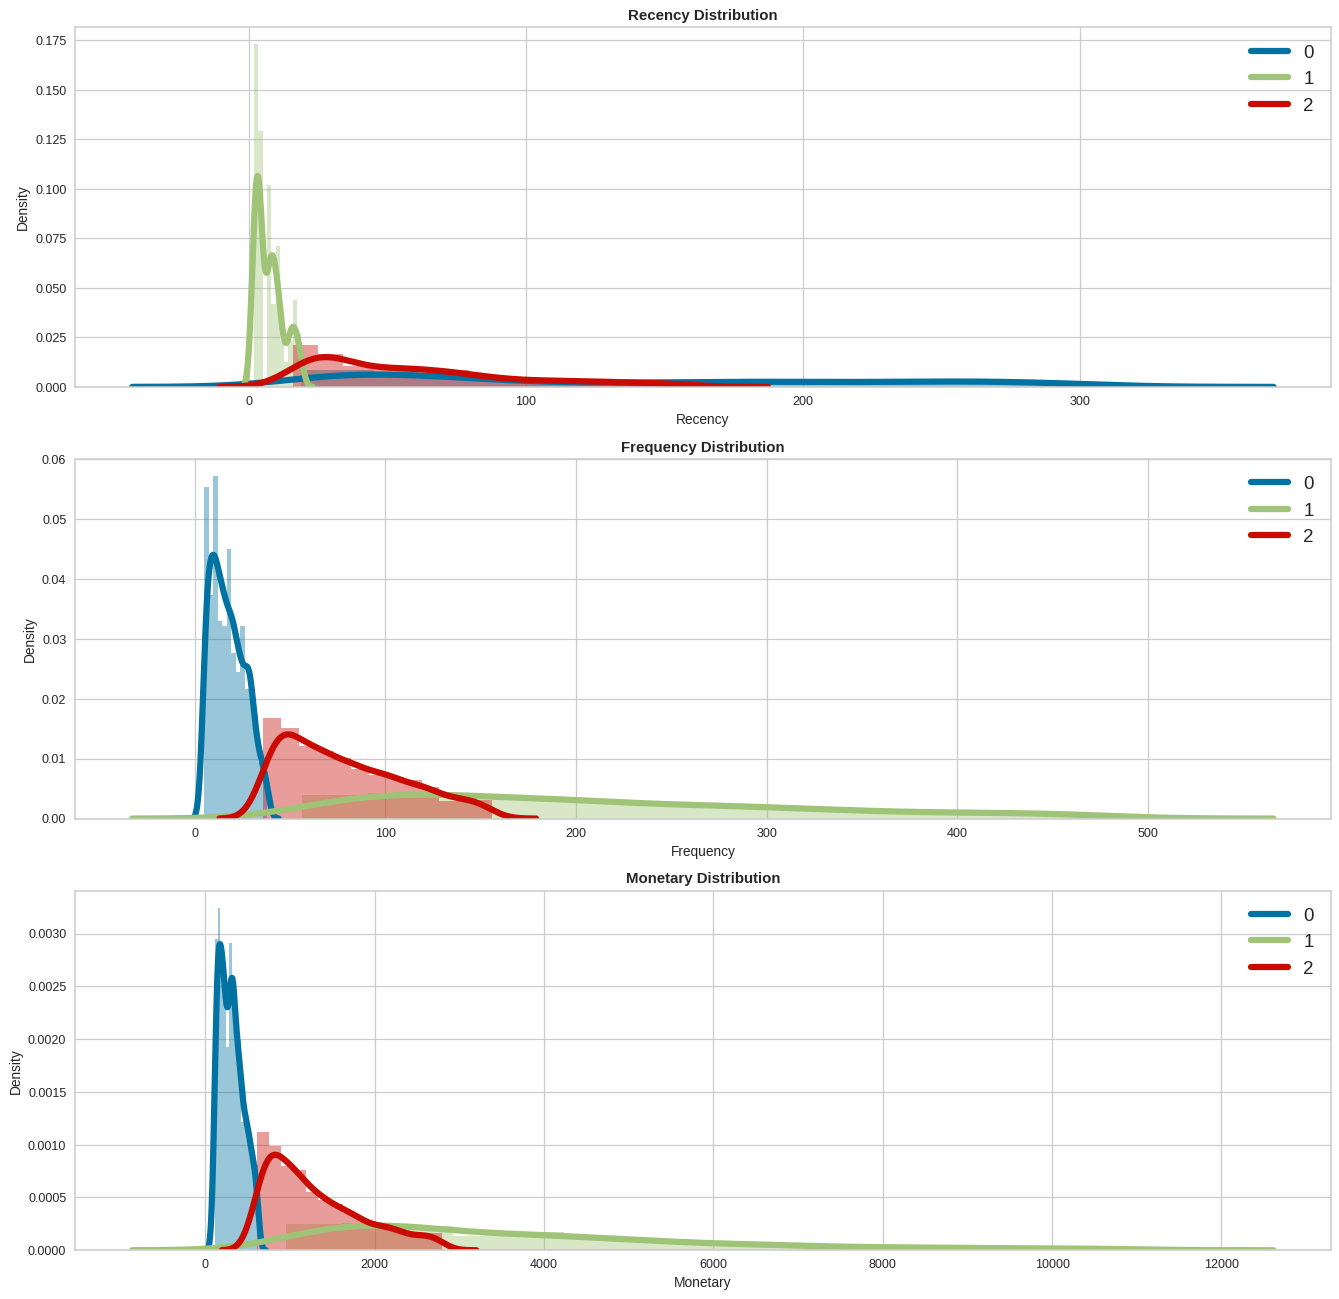



Discriptive Statistics for each segment:



AHC with n=3,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,139.585342,102.000000,19.969624,16.000000,534.544847,300.390000,2074
1,9.063183,7.000000,274.784933,186.000000,6791.309465,3023.080000,823
2,71.042996,50.000000,86.800971,71.000000,1518.249786,1135.335000,1442




Cluster Discription:



AHC with n=3,Last_visited,Purchase_frequency,Money_spent
0,39 to 237 days ago,Bought 9 to 27 times,Spent around 171 to 439 Sterling
1,3 to 12 days ago,Bought 103 to 310 times,Spent around 1711 to 5490 Sterling
2,25 to 91 days ago,Bought 47 to 110 times,Spent around 776 to 1823 Sterling


In [69]:
#Instantiating Agglomerative Clustering with n=3
ahc_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')     
#Fitting the model
y = ahc_3.fit_predict(X)                                                                

#Plotting the Results
title = 'Agglomerative Hierarchical Clustering (n=3)'                                
segment_name = 'AHC with n=3'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)